In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
np.random.seed(0)

In [12]:
from keras.datasets import mnist

In [11]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [13]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


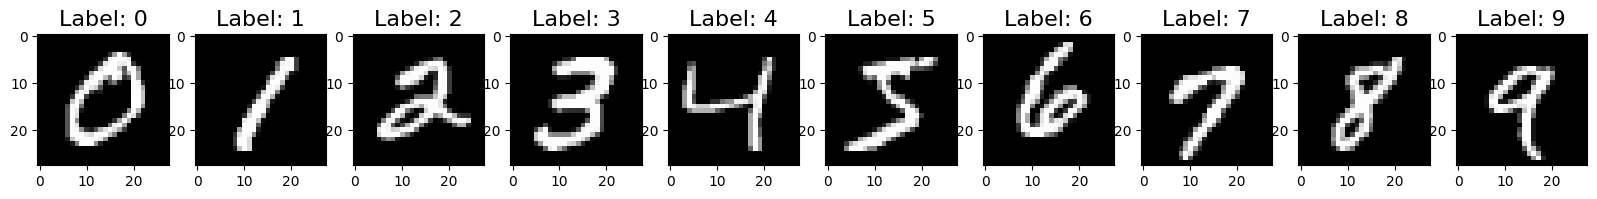

In [16]:
numclasses=10
f,ax=plt.subplots(1,numclasses,figsize=(20,20))

for i in range(0,numclasses):
  sample=xtrain[ytrain==i][0]
  ax[i].imshow(sample,cmap='gray')
  ax[i].set_title("Label: {}".format(i),fontsize=16)

In [18]:
for i in range(10):
  print(ytrain[i])

5
0
4
1
9
2
1
3
1
4


In [19]:
ytrain=keras.utils.to_categorical(ytrain,numclasses)
ytest=keras.utils.to_categorical(ytest,numclasses)

In [20]:
for i in range(10):
  print(ytrain[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [21]:
xtrain=xtrain/255
xtest=xtest=xtest/255

In [22]:
xtrain=xtrain.reshape(xtrain.shape[0],-1)
xtest=xtest.reshape(xtest.shape[0],-1)
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [24]:
model=Sequential()
model.add(Dense(units=128,input_shape=(784,),activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
batchsize=512
epochs=12
model.fit(x=xtrain,y=ytrain,batch_size=batchsize,epochs=epochs)

Epoch 1/12
118/118 [==============================] - 2s 10ms/step - loss: 0.6124 - accuracy: 0.8205
Epoch 2/12
118/118 [==============================] - 1s 11ms/step - loss: 0.2274 - accuracy: 0.9340
Epoch 3/12
118/118 [==============================] - 2s 15ms/step - loss: 0.1619 - accuracy: 0.9524
Epoch 4/12
118/118 [==============================] - 1s 10ms/step - loss: 0.1290 - accuracy: 0.9622
Epoch 5/12
118/118 [==============================] - 1s 10ms/step - loss: 0.1055 - accuracy: 0.9690
Epoch 6/12
118/118 [==============================] - 1s 10ms/step - loss: 0.0894 - accuracy: 0.9738
Epoch 7/12
118/118 [==============================] - 1s 10ms/step - loss: 0.0761 - accuracy: 0.9770
Epoch 8/12
118/118 [==============================] - 1s 10ms/step - loss: 0.0655 - accuracy: 0.9801
Epoch 9/12
118/118 [==============================] - 1s 10ms/step - loss: 0.0588 - accuracy: 0.9822
Epoch 10/12
118/118 [==============================] - 1s 10ms/step - loss: 0.0515 - accura

In [26]:
testloss,testacc=model.evaluate(xtest,ytest)
print("Test loss is {}, Test accuracy is {}".format(testloss,testacc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0725 - accuracy: 0.9785
Test loss is 0.07247637957334518, Test accuracy is 0.9785000085830688


In [28]:
y_pred=model.predict(xtest)
y_pred_classes=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[8.78084904e-07 3.63782419e-07 6.72734132e-06 ... 9.99954045e-01
  5.36421737e-07 6.20834908e-06]
 [9.89873961e-09 5.46006013e-05 9.99857187e-01 ... 6.50153211e-08
  8.26967516e-05 9.36037581e-10]
 [5.28419775e-07 9.99464154e-01 5.88976218e-05 ... 3.08972492e-04
  4.31066946e-05 1.04750416e-06]
 ...
 [2.71612843e-09 5.18119769e-08 7.34564909e-11 ... 6.05720334e-06
  2.76175388e-06 2.67075302e-06]
 [2.83308349e-10 1.76381043e-08 3.61910191e-09 ... 1.16124745e-07
  1.08654285e-05 4.12660982e-11]
 [1.01942488e-09 6.48677986e-11 2.13173101e-09 ... 4.56253525e-13
  2.34635228e-10 5.55610896e-13]]
[7 2 1 ... 4 5 6]


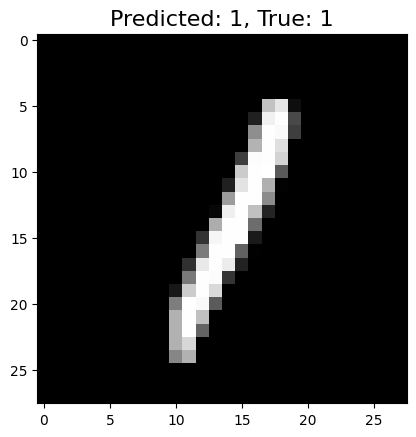

In [30]:
#SINGLE EXAMPLE
random_idx=np.random.choice(len(xtest))
xsample=xtest[random_idx]
ytrue=np.argmax(ytest,axis=1)
y_sample_true=ytrue[random_idx]
y_sample_pred_class=y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class,y_sample_true),fontsize=16)
plt.imshow(xsample.reshape(28,28),cmap='gray')